In [116]:
# Import pandas, a data science library, and matplotlib for plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [117]:
family_heights = pd.read_csv('galtonfamilies.csv')
family_heights[0:5]

,id,family,father,mother,midparentheight,children,childnum,gender,childheight
0,1,1,78.5,67.0,75.430000,4,1,male,73.199997
1,2,1,78.5,67.0,75.430000,4,2,female,69.199997
2,3,1,78.5,67.0,75.430000,4,3,female,69.000000
3,4,1,78.5,67.0,75.430000,4,4,female,69.000000
4,5,2,75.5,66.5,73.660004,4,1,male,73.500000


# Tables: Grouping, Pivoting, Joining

What if we wanted to seperately study the heights of the sons and the daugheters of each family? In this section we will learn how use the pandas library to manipulate tables.

Let's create a seperate data structure containing the height information for just the parents. First, select the columns containing the family code, height of father, height of mother, and average height of parents.

In [132]:
parent_heights = family_heights[['family','father', 'mother', 'midparentheight']]
parent_heights[0:5]

,family,father,mother,midparentheight
0,1,78.5,67.0,75.430000
1,1,78.5,67.0,75.430000
2,1,78.5,67.0,75.430000
3,1,78.5,67.0,75.430000
4,2,75.5,66.5,73.660004


You can see that each entry of the data structure still cooresponds to an individual child. We want to reduce the number of entries, so that there is only one row for every family. We can do this by **grouping** the rows of the data structure by family.

In [133]:
parent_heights = parent_heights.groupby('family').mean()
parent_heights[0:5]

,father,mother,midparentheight
family,,,
1,78.5,67.000000,75.430000
10,74.0,65.500000,72.370003
100,69.0,66.000000,70.139999
101,69.0,66.699997,70.517998
102,69.0,66.000000,70.139999


Now that we have a table of parent heights, let's find a table for the heights of the children! From the original data structure, create a new data structure called 'children_heights' which contains the family code, gender, and height of each child.

In [134]:
children_heights = family_heights[['family', 'gender', 'childheight']]
children_heights[0:5]

,family,gender,childheight
0,1,male,73.199997
1,1,female,69.199997
2,1,female,69.000000
3,1,female,69.000000
4,2,male,73.500000


Let's now look at ther average daughter and son heights for each family. In this case, we can use **pivot** to find the average heights of male and female children in each of the families in the data set

In [135]:
average_child_height_by_gender = pd.pivot_table(children_heights, values = 'childheight', index = ['family'], columns = ['gender'])
average_child_height_by_gender[0:5]

gender,female,male
family,,
1,69.066666,73.199997
10,65.500000,NaN
100,NaN,70.733332
101,NaN,72.375000
102,63.500000,68.833333


Now that we have tables for both parent and child height, we want to somehow combine the two data structure so we can make comparisons between parent and child height. We can use **join**, which merges two data structures based on a shared attribute. In this case, parent_heights and average_child_height_by_gender both have a "family" attribute. Joining the two tables would match columns with each other in accordance to their family.

In [188]:
family_average_heights = parent_heights.join(average_child_height_by_gender)
family_average_heights[0:5]

,father,mother,midparentheight,female,male
family,,,,,
1,78.5,67.000000,75.430000,69.066666,73.199997
10,74.0,65.500000,72.370003,65.500000,NaN
100,69.0,66.000000,70.139999,NaN,70.733332
101,69.0,66.699997,70.517998,NaN,72.375000
102,69.0,66.000000,70.139999,63.500000,68.833333


# Visualization: Scatter Plots and Histograms

Let's use this table to compare the children's height to their parents! Start off with by finding the different between daughters' heights to their mothers' heights. Add these values to the family_average_heights data structure.

In [189]:
mother_daughter_difference = family_average_heights['female'] - family_average_heights['mother']
family_average_heights['mother_daughter_height_difference'] = mother_daughter_difference

family_average_heights[0:5]

,father,mother,midparentheight,female,male,mother_daughter_height_difference
family,,,,,,
1,78.5,67.000000,75.430000,69.066666,73.199997,2.066666
10,74.0,65.500000,72.370003,65.500000,NaN,0.000000
100,69.0,66.000000,70.139999,NaN,70.733332,NaN
101,69.0,66.699997,70.517998,NaN,72.375000,NaN
102,69.0,66.000000,70.139999,63.500000,68.833333,-2.500000


Let's plot mother_daughter_height_difference on a histogram to see the distribution of height differences.

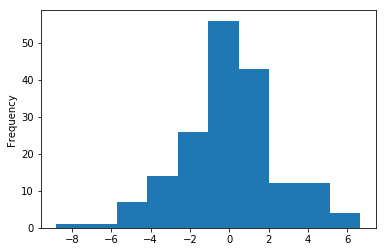

In [190]:
family_average_heights['mother_daughter_height_difference'].plot.hist()

By looking by the histogram, we see that the **mean** of the height difference between mothers and daughters is around 0. This means, that on average, daughters tend to be around the same height as their mothers. However, the wide distribution of height differences makes it difficult for us to conclude a relationship between daughter and mother height.

Let's look at a scatterplot between mother heights and daughter heights now.

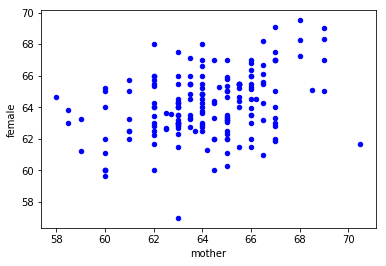

In [198]:
family_average_heights.plot.scatter(x = 'mother', y = 'female', color = 'b')

We see that there is not a clear relationship between the two heights, and are hesitant to draw any conclusions about the relationship between mother and daughter heights.

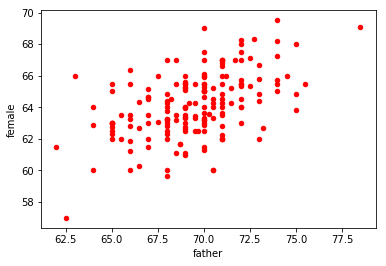

In [199]:
family_average_heights.plot.scatter(x = 'father', y = 'female', color = 'r')

Let's instead look at the relationship between the height of daughters and the average height of their parents. Create a scatter plot that compares midparentheight and female.

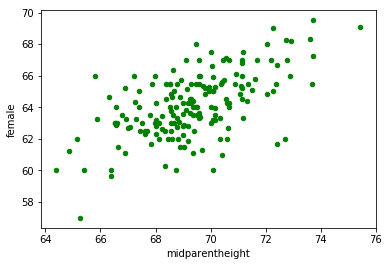

In [203]:
family_average_heights.plot.scatter(x = 'midparentheight', y = 'female', color = 'g')

We can see that the average parent height and daughter height appear to have more of a linear relationship. This makes sense, since inheritance of height is dependent on both parents, not just the mother or father